<a href="https://colab.research.google.com/github/faisu6339-glitch/ML-Projects-/blob/main/P_8_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [ ]:
df=pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


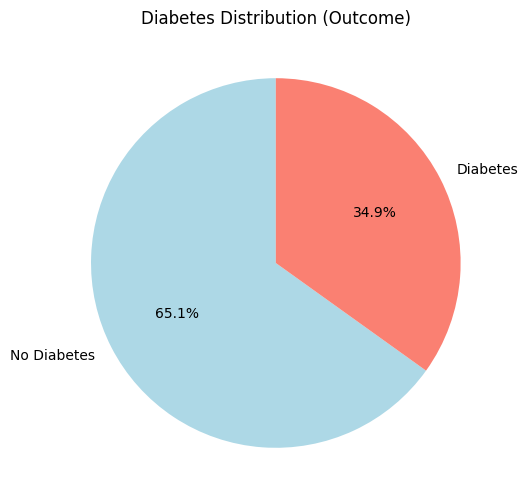

In [ ]:
# Plot pie chart
import matplotlib.pyplot as plt
counts = df['Outcome'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=['No Diabetes', 'Diabetes'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'salmon']
)

plt.title('Diabetes Distribution (Outcome)')
plt.show()

In [ ]:
df.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


1. Pregnancies

<Axes: xlabel='Pregnancies', ylabel='Count'>

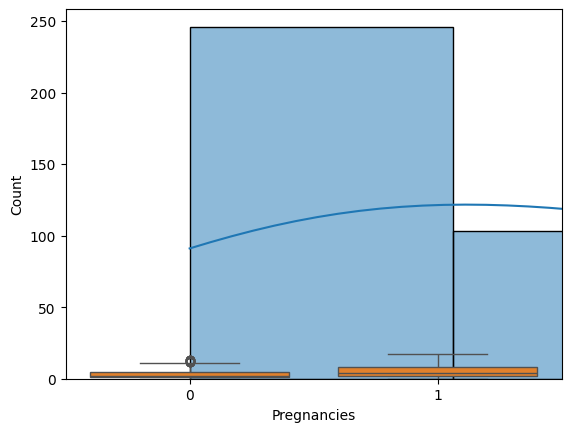

In [ ]:
import seaborn as sns

sns.histplot(df['Pregnancies'], kde=True)
sns.boxplot(x='Outcome', y='Pregnancies', data=df)


2. Glucose

<Axes: xlabel='Glucose', ylabel='Count'>

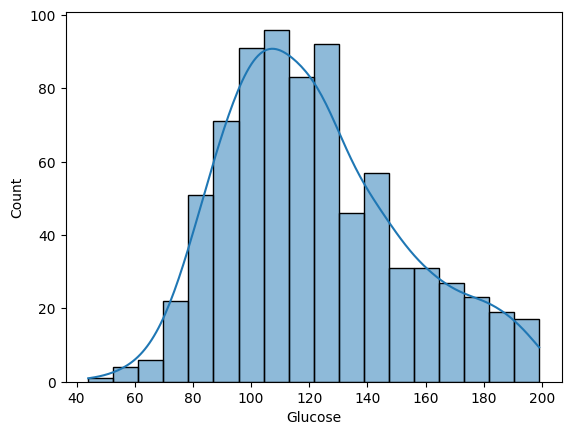

In [ ]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].median())

sns.histplot(df['Glucose'], kde=True)


<Axes: xlabel='Outcome', ylabel='Glucose'>

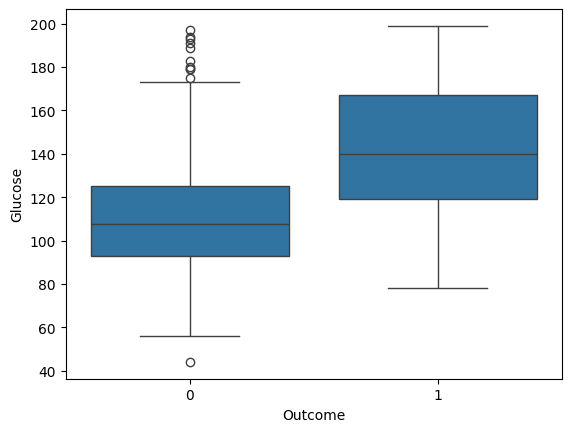

In [ ]:
sns.boxplot(x='Outcome', y='Glucose', data=df)

3. BloodPressure

In [ ]:
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())


<Axes: xlabel='Outcome', ylabel='BloodPressure'>

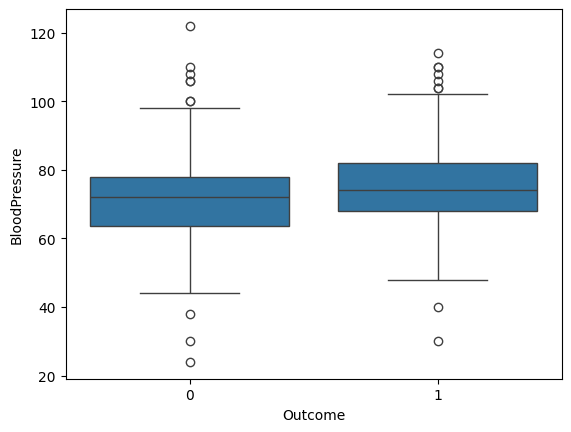

In [ ]:
sns.boxplot(x='Outcome', y='BloodPressure', data=df)


BMI

In [ ]:
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())


<Axes: xlabel='Outcome', ylabel='BMI'>

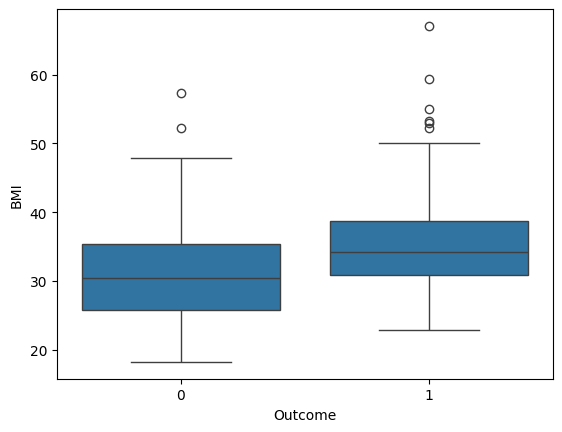

In [ ]:
sns.boxplot(x='Outcome', y='BMI', data=df)


<Axes: xlabel='Age', ylabel='Count'>

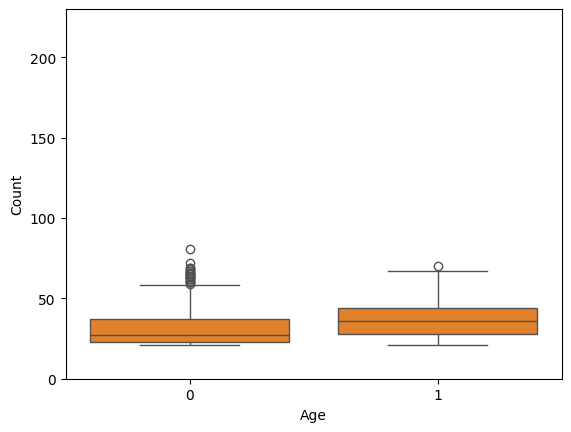

In [ ]:
sns.histplot(df['Age'], kde=True)
sns.boxplot(x='Outcome', y='Age', data=df)


In [ ]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[20,30,40,50,60,80])


<Axes: ylabel='count'>

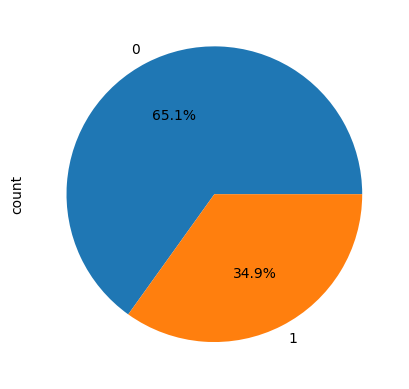

In [ ]:
df['Outcome'].value_counts()
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%')


In [ ]:
X=df.drop(columns=['Outcome', 'AgeGroup'], axis=1)
Y=df['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


#Data Standardization

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data=scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29849289 -0.47378505
  -0.87137393]]


In [ ]:
X=standardized_data
Y=df['Outcome']

In [ ]:
print(X)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29849289 -0.47378505
  -0.87137393]]


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


#Training the Model

In [ ]:
# The classifier definition has been moved to the next cell to ensure it's always defined before use.

In [ ]:
classifier=svm.SVC(kernel='linear')
# Training the SVM model
classifier.fit(X_train, Y_train)

# Making predictions
Y_pred = classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7727272727272727


In [ ]:
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print("Accuracy of the training data:",training_data_accuracy)

Accuracy of the training data: 0.7817589576547231


In [ ]:
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print("Accuracy of the test data:",test_data_accuracy)

Accuracy of the test data: 0.7727272727272727


#Making Prediction for new data

In [ ]:
input_data=(5,166,72,19,175,25.8,0.4, 30) # Added a placeholder for 'Age'
input_data_as_numpy_array=np.asarray(input_data)

#reshaping the array as we are predicting
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#Standardize the input data
std_data=scaler.transform(input_data_reshaped)
print(std_data)

[[ 0.3429808   1.45779063 -0.03198993 -0.09637905  0.82661621 -0.96798414
  -0.21707496 -0.27575966]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
prediction=classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
  print('The person is not diabetic')
elif (prediction[0]==1):
  print('The person is diabetic')

[1]
The person is diabetic
